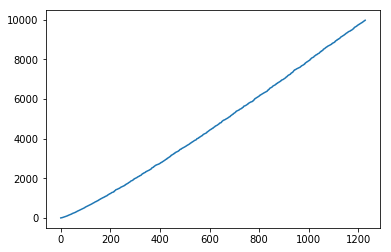

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
prime = pd.read_table("./primelist10000.txt")
prime1000000 = pd.read_table("./primelist1000000.txt")

%matplotlib inline
plt.plot(prime)


In [41]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
y = np.array(prime)
X_train, X_test, y_train, y_test = train_test_split(prime, y,test_size=0.33, random_state=0)

In [42]:
y[1]

array([5])

In [43]:
import numpy as np

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 31,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0
}

# train
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)

y_pred = gbm.predict(test_df, num_iteration=gbm.best_iteration)

TypeError: Wrong type(ndarray) for label, should be list or numpy array